# Regression Metrics

Different kind of Metrics for Regression:
1) MAE
2) MSE
3) RMSE
4) R2 Score
5) Adjusted R2 score

Note that the normal accuracy score we used is not applicable to linear regression, as it tells the proportion of the prediction which is correct. This can be misleading in the case of Regression model as that is not the aim.

## MAE (Mean Absolute Error)

Mean of Sum of Absolute values of difference in y_pred and y_actual

Advantage: 

1) Unit of loss is same as the data(no squaring here)
2) Robust for outlers

Disadvantage:

1) Modulus is not differentibale at x = 0, we need differentiable

## MSE (Mean Squared Error)

Here we take the squares of values as well, then mean 

Disadvantage:

1) Unit is squared, difficult to interpret
2) Outliers are penalised a lot, due to square. Not Robust to outlier

## RMSE (Root of MSE)

Root of the above MSE, gives the same unit as input, not robust to outliers.

## R2 Score (Coeff of Determination) (Goodness of fit)

This gives a understandable value indpendent of the values, unline MSE and MAE. 

R2 = 1 - (SSr/SSm) , Sum of sq error in regression line and mean line

1) R2 = 0, means their is no benefit of paramter
2) R2 = 1, means regression is perfect
3) R2 < 0, means mean line is better in predicting than regression line

The R2 score in a way tells what proportion of variance in the result variable is described by the input variable

## Adjusted R2 Score

As the input columns increases, the R2 score gets fabricated even when the input column was irrelevant.

R2adj = 1 - [ ( 1 - R2 ) * ( n - 1 ) / ( n - 1 - k) ]

# Implementing the Metrics

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/cgpa_placement.csv')
df.sample()

,cgpa,package
106,6.13,2.19


In [3]:
X , y = df.iloc[:, 0:1], df.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.sample()

,cgpa
38,8.62


In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

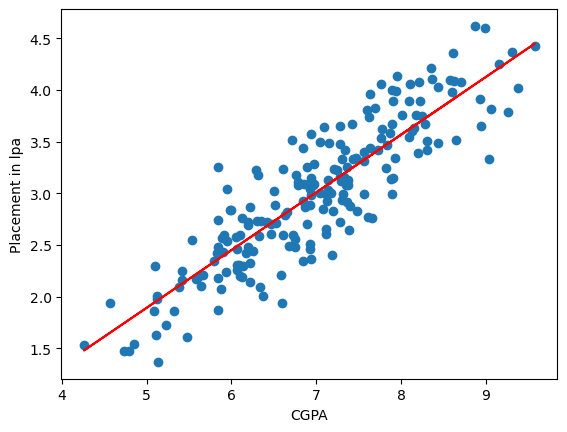

In [6]:
plt.scatter(x = X, y = y)
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel("CGPA")
plt.ylabel("Placement in lpa")
plt.show()

In [7]:
mean_absolute_error(y_test, y_pred)

0.2884710931878175

In [8]:
mean_squared_error(y_test, y_pred)

0.12129235313495527

In [9]:
r2 = r2_score(y_test, y_pred)
r2

0.780730147510384

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.34827051717731616

In [11]:
adj_r2 = (1 - ((1-r2)*(X_test.size-1)/(40-1-X_test.shape[1])))
adj_r2

0.7749598882343415

## Adding a Random column for R2 Adjusted check

In [21]:
df1 = df.copy()
df1['random'] = np.random.random(200)
df1 = df1[['cgpa','random', 'package']]
df1.describe()

,cgpa,random,package
count,200.000000,200.000000,200.000000
mean,6.990500,0.491084,2.996050
std,1.069409,0.290027,0.691644
min,4.260000,0.006694,1.370000
25%,6.190000,0.245183,2.487500
50%,6.965000,0.494045,2.995000
75%,7.737500,0.721722,3.492500
max,9.580000,0.997830,4.620000


In [13]:
X , y = df1.iloc[:, 0:2], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [25]:
r2 = r2_score(y_test, y_pred)
adj_r2 = (1 - (( 1 - r2 )*( X_test.shape[0] - 1)/(40 - 1 - X_test.shape[1])))

print(f"R2: {r2}, AdjR2: {adj_r2}")

R2: 0.782343446078542, AdjR2: 0.7705782269476524
